<br><h3> A2 | Unsupervised Analysis Project </h3>
<h4>DAT-5303 | Machine Learning</h4>
Team 14 - Noah Freedman, Rui Kang, Jesal Panchal & Arline Garin<br>
Hult International Business School<br><br>

<h2 style='margin-top:25.0pt;margin-right:0cm;margin-bottom:15.0pt;margin-left:0cm;text-align:center;border:none;padding:0cm;font-size:29px;font-family:"Calibri Light",sans-serif;color:#833C0B;font-weight:normal;'>Windows or Mac?</h2>
<hr style="height:.9px;border:none;color:#833C0B ;background-color:#833C0B ;" />
<hr style="height:.9px;border:none;color:#833C0B ;background-color:#833C0B ;" />

<b>Research Question: Apple or Microsoft?</b>

Since the beginning of the tech boom, consumers have always been faced with this question when buying a laptop. Each containing their own pros and cons consumers constantly ponder which fulfill their wants more and which is dominant in its overall performance. Each manufacturer must dissect why consumers buy their products based on behaviors and preferences but more specifically, who buys them. Throughout the analysis, personae will be made based on psychological behaviors and demographics to pinpoint potential buyers.

To further enhance data analysis a survey was conducted revolving around the <b>"Big Five Personality Traits"</b>, also known as "OCEAN", and the <b>Hult DNA</b>.

<b>Big Five Traits (OCEAN): </b>
1) Openness to Experiences \
2) Conscientiousness \
2) Extroverted \
4) Agreeableness \
5) Neuroticism  

<b>Hult DNA:</b>
1) Thinking   
2) Communicating  
3) Team Building

<b>Assumptions: </b>\
The data, including demographics, is fully representative of what the companies are studying. Furthermore, readers, knowledgeable of what the Big Five traits and Hult DNA encompass.

<b>Methodology: </b> 

The analysis will be based on analyzing the demographics and psycho-graphics of the respondents. Since OCEAN and Hult DNA measure behavioral and psychometric tendencies, they will be analyzed in unison during the unsupervised learning while demographic data will be used to complement and magnify results generating valuable insights and takeaways.

In [93]:
# Importing Libraries and Packages 
import numpy as np                                      # mathematical essentials
import pandas            as pd                          # data science essentials
import matplotlib.pyplot as plt                         # fundamental data visualization
import seaborn           as sns                         # enhanced visualizations
from sklearn.preprocessing   import StandardScaler      # standard scaler
from sklearn.decomposition   import PCA                 # pca
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from sklearn.cluster         import KMeans              # k-means clustering


# Setting Pandas Print Options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

# Specifying the path and reading the excel file into python as dataset
file = './survey_data.xlsx'
dataset = pd.read_excel(io = file)

# Checking the File head
#dataset.head(n = 5)

In [94]:
# outlier and threshold mapping  
def threshold_outlier_flagging(dataframe, feature, threshold_val, threshold_type, bound):
#     automate outlier and flagging process
    if threshold_type == 'outlier':
        if bound == 'high':
            _out_label = "out_{}_hi".format(feature)
            dataframe.loc[:, _out_label] = 0
            for index, val in dataframe.iterrows(): 
                if dataframe.loc[index, feature] > threshold_val:
                    dataframe.loc[index, _out_label] = 1
        elif bound == "low":
            _out_label = "out_{}_lo".format(feature)
            dataframe.loc[:, _out_label] = 0
            for index, val in dataframe.iterrows(): 
                if dataframe.loc[index, feature] < threshold_val:
                    dataframe.loc[index, _out_label] = 1
        else:
            print("Flagging of outliers failed")
            
    elif threshold_type == 'threshold':
        if bound == 'high':
            _out_label = "flag_{}_hi".format(feature)
            dataframe.loc[:, _out_label] = 0
            for index, val in dataframe.iterrows(): 
                if dataframe.loc[index, feature] > threshold_val:
                    dataframe.loc[index, _out_label] = 1
        elif bound == "low":
            _out_label = "flag_{}_lo".format(feature)
            dataframe.loc[:, _out_label] = 0
            for index, val in dataframe.iterrows(): 
                if dataframe.loc[index, feature] < threshold_val:
                    dataframe.loc[index, _out_label] = 1
        else:
            print("Gandalf, the process has failed")
            
    elif threshold_type == 'trend':
        _out_label = "trend_{}".format(feature)
        dataframe.loc[:, _out_label] = 0
        for index, val in dataframe.iterrows(): 
            if dataframe.loc[index, feature] == threshold_val:
                dataframe.loc[index, _out_label] = 1

########################################
# pca_plotter
########################################
# optional color scheme
colors_lst = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
              "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]


# pca_plotter
def pca_plotter(bunch,
                colors  = None,
                x_label = "First principal component",
                y_label = "Second principal component"):
    """
PARAMETERS
----------
bunch        : Bunch object to be used in PCA
colors       : color coding for target labels, default None
x_label      : x-label for PC 0, default "First principal component"
y_label      : y-label for PC 1, default "Second principal component"
"""

    # INSTANTIATING a PCA object
    pca = PCA(n_components = 2,
              random_state = 219)


    # FITTING and TRANSFORMING the data
    dataset_pca = pca.fit_transform(bunch.data)

    
    # setting figure options
    plt.figure(figsize=(10, 10))
    plt.xlim(dataset_pca[:, 0].min(), dataset_pca[:, 0].max())
    plt.ylim(dataset_pca[:, 1].min(), dataset_pca[:, 1].max())


    # data vizualization
    for i in range(len(bunch.data)):

        plt.text(dataset_pca[i, 0],
                 dataset_pca[i, 1],
                 str(bunch.target[i]),
                 color = colors[bunch.target[i]],
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xlabel(xlabel = x_label)
    plt.ylabel(ylabel = y_label)
    plt.show()

    
########################################
# tsne_plotter
########################################
# optional color scheme
colors_lst = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
              "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]


# tsne_plotter
def tsne_plotter(bunch,
                 colors  = None,
                 x_label = "t-SNE feature 0",
                 y_label = "t-SNE feature 1"):
    """
PARAMETERS
----------
bunch        : Bunch object to be used in TSNE
colors       : color coding for target labels, default None
x_label      : x-label for t-SNE feature 0, default "t-SNE feature 0"
y_label      : y-label for t-SNE feature 1, default "t-SNE feature 1"
"""
    
    # INSTANTIATING a PCA object
    tsne = TSNE(random_state = 219)

    
    # FITTING and TRANSFORMING the data
    dataset_tsne = tsne.fit_transform(bunch.data)

    
    # setting figure options
    plt.figure(figsize=(10, 10))
    plt.xlim(dataset_tsne[:, 0].min(), dataset_tsne[:, 0].max() + 1)
    plt.ylim(dataset_tsne[:, 1].min(), dataset_tsne[:, 1].max() + 1)

    
    # data vizualization
    for i in range(len(bunch.data)):

        plt.text(dataset_tsne[i, 0],
                 dataset_tsne[i, 1],
                 str(bunch.target[i]),
                 color    = colors[bunch.target[i]],
                 fontdict = {'weight': 'bold', 'size': 9})

    plt.xlabel(xlabel = x_label)
    plt.ylabel(ylabel = y_label)
    plt.show()
    
########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()
    
########################################
# inertia
########################################
def interia_plot(data, max_clust = 50):
    """
PARAMETERS
----------
data      : DataFrame, data from which to build clusters. Dataset should be scaled
max_clust : int, maximum of range for how many clusters to check interia, default 50
    """

    ks = range(1, max_clust)
    inertias = []


    for k in ks:
        # INSTANTIATING a kmeans object
        model = KMeans(n_clusters = k)


        # FITTING to the data
        model.fit(data)


        # append each inertia to the list of inertias
        inertias.append(model.inertia_)



    # plotting ks vs inertias
    fig, ax = plt.subplots(figsize = (12, 8))
    plt.plot(ks, inertias, '-o')


    # labeling and displaying the plot
    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.show()

<div style='margin-top:0cm;margin-right:0cm;margin-bottom:10.0pt;margin-left:0cm;line-height:115%;font-size:15px;font-family:"Calibri Light",sans-serif;border-top:dotted #833C0B 1.0pt;border-left:none;border-bottom:dotted #833C0B 1.0pt;border-right:none;padding:1.0pt 0cm 6.0pt 0cm;'>
    <h2 style='margin-top:25.0pt;margin-right:0cm;margin-bottom:15.0pt;margin-left:0cm;text-align:center;border:none;padding:0cm;font-size:29px;font-family:"Calibri Light",sans-serif;color:#833C0B;font-weight:normal;'>Data Cleaning</h2>
</div>

### Nationality

In [95]:
## Renaming Columns ##

# Renaming the Nationality column 
dataset.rename(columns = {'What is your nationality? ':'Nationality'}, inplace = True)

# Renaming the Age column
dataset.rename(columns = {'What is your age?':'Age'}, inplace = True)

#dataset.shape

In [96]:
dataset['Nationality'] = dataset['Nationality'].str.capitalize()

for index, row in dataset.iterrows(): 
    
    if 'Usa' in dataset.loc[index, 'Nationality']:
        dataset.loc[index, 'Nationality'] = 'American'
        
    elif 'Ind' in dataset.loc[index, 'Nationality']:
        dataset.loc[index, 'Nationality'] = 'Indian'
        
    elif 'Congo' in dataset.loc[index, 'Nationality']:
        dataset.loc[index, 'Nationality'] = 'Congolese'
        
    elif 'Kor' in dataset.loc[index, 'Nationality'] or 'kor' in dataset.loc[index, 'Nationality']:
        dataset.loc[index, 'Nationality'] = 'Korean'
        
    elif 'Ecua' in dataset.loc[index, 'Nationality']:
        dataset.loc[index, 'Nationality'] = 'Ecuadorian'
        
    elif 'Chi' in dataset.loc[index, 'Nationality']:
        dataset.loc[index, 'Nationality'] = 'Chinese'
        
    elif 'Phili' in dataset.loc[index, 'Nationality'] or 'Fili' in dataset.loc[index, 'Nationality']:
        dataset.loc[index, 'Nationality'] = 'Filipino'
        
    elif 'Tai' in dataset.loc[index, 'Nationality']:
        dataset.loc[index, 'Nationality'] = 'Taiwanese'
        
    elif 'Prefer' in dataset.loc[index, 'Nationality']:
        dataset.loc[index, 'Nationality'] = 'Unknown'
        
    elif 'Russ' in dataset.loc[index, 'Nationality'] or 'russ' in dataset.loc[index, 'Nationality']:
        dataset.loc[index, 'Nationality'] = 'Russian'
        
    elif 'Maur' in dataset.loc[index, 'Nationality']:
        dataset.loc[index, 'Nationality'] = 'Mauritian'
        
    elif 'Belar' in dataset.loc[index, 'Nationality']: 
        dataset.loc[index, 'Nationality'] = 'Belarusian'
        
    elif 'Belg' in dataset.loc[index, 'Nationality']: 
        dataset.loc[index, 'Nationality'] = 'Belgian'
        
    elif 'Domin' in dataset.loc[index, 'Nationality']:
        dataset.loc[index, 'Nationality'] = 'Dominican'
        
    elif 'Japan' in dataset.loc[index, 'Nationality']:
        dataset.loc[index, 'Nationality'] = 'Japanese'
    
    elif 'German' in dataset.loc[index, 'Nationality']:
        dataset.loc[index, 'Nationality'] = 'German'
        
    elif 'Czech' in dataset.loc[index, 'Nationality']:
        dataset.loc[index, 'Nationality'] = 'Czech' 
        
    elif 'Colombia' in dataset.loc[index, 'Nationality']:
        dataset.loc[index, 'Nationality'] = 'Colombian'
        
    elif 'Spa' in dataset.loc[index, 'Nationality'] or 'spa' in dataset.loc[index, 'Nationality']:
        dataset.loc[index, 'Nationality'] = 'Spanish'
        
    elif 'Peru' in dataset.loc[index, 'Nationality']:
        dataset.loc[index, 'Nationality'] = 'Peruvian'
        
    elif 'Panam' in dataset.loc[index, 'Nationality']:
        dataset.loc[index, 'Nationality'] = 'Panamanian'
        
    elif 'Canad' in dataset.loc[index, 'Nationality']:
        dataset.loc[index, 'Nationality'] = 'Canadian'
    
    elif 'Nige' in dataset.loc[index, 'Nationality']:
        dataset.loc[index, 'Nationality'] = 'Nigerian'
        
    elif 'Braz' in dataset.loc[index, 'Nationality']:
        dataset.loc[index, 'Nationality'] = 'Brazilian'
        
    elif 'indi' in dataset.loc[index, 'Nationality']:
        dataset.loc[index, 'Nationality'] = 'Indian'

In [97]:
# Create World Region feature 

dataset['World_Region'] = 0

for index, row in dataset.iterrows(): 
    
    if 'American' in dataset.loc[index, 'Nationality'] or 'Canadian' in dataset.loc[index, 'Nationality'] or 'Mexican' in dataset.loc[index, 'Nationality']:
        dataset.loc[index, 'World_Region'] = 'North_America' 
        
    elif 'Peruvian' in dataset.loc[index, 'Nationality'] or 'Brazilian' in dataset.loc[index, 'Nationality'] or \
    'Colombian' in dataset.loc[index, 'Nationality'] or 'Ecuadorian' in dataset.loc[index, 'Nationality'] or \
    'Dominican' in dataset.loc[index, 'Nationality'] or 'Panamanian' in dataset.loc[index, 'Nationality'] or \
    'Costarrican' in dataset.loc[index, 'Nationality'] or 'Venezuelan' in dataset.loc[index, 'Nationality']:
        dataset.loc[index, 'World_Region'] = 'South_America'
        
    elif 'Indian' in dataset.loc[index, 'Nationality'] or 'Chinese' in dataset.loc[index, 'Nationality'] or \
    'Korean' in dataset.loc[index, 'Nationality'] or 'Taiwanese' in dataset.loc[index, 'Nationality'] or \
    'Filipino' in dataset.loc[index, 'Nationality'] or 'Thai' in dataset.loc[index, 'Nationality'] or \
    'Vietnamese' in dataset.loc[index, 'Nationality'] or 'Japanese' in dataset.loc[index, 'Nationality']:
        dataset.loc[index, 'World_Region'] = 'Asia'
        
    elif 'German' in dataset.loc[index, 'Nationality'] or 'Russian' in dataset.loc[index, 'Nationality'] or \
    'Spanish' in dataset.loc[index, 'Nationality'] or 'Italian' in dataset.loc[index, 'Nationality'] or \
    'Norwegian' in dataset.loc[index, 'Nationality'] or 'Czech' in dataset.loc[index, 'Nationality'] or \
    'Ukrainian' in dataset.loc[index, 'Nationality'] or 'Swiss' in dataset.loc[index, 'Nationality'] or \
    'Belgian' in dataset.loc[index, 'Nationality'] or 'British' in dataset.loc[index, 'Nationality'] or \
    'Portuguese' in dataset.loc[index, 'Nationality'] or 'Belarusian' in dataset.loc[index, 'Nationality']:
        dataset.loc[index, 'World_Region'] = 'Europe'
        
    elif 'Turkish' in dataset.loc[index, 'Nationality'] or 'Kyrgyz' in dataset.loc[index, 'Nationality']:
        dataset.loc[index, 'World_Region'] = 'Middle_East'
        
    elif 'Nigerian' in dataset.loc[index, 'Nationality'] or 'Congolese' in dataset.loc[index, 'Nationality'] or \
    'Mauritian' in dataset.loc[index, 'Nationality'] or 'Ugandan' in dataset.loc[index, 'Nationality'] or \
    'Ghanaian' in dataset.loc[index, 'Nationality'] or 'Kenyan' in dataset.loc[index, 'Nationality'] or \
    'Pakistani' in dataset.loc[index, 'Nationality']:
        dataset.loc[index, 'World_Region'] = 'Africa'
        
    elif 'Unknown' in dataset.loc[index, 'Nationality']:
        dataset.loc[index, 'World_Region'] = 'Unknown'

### Laptop-related Columns

In [98]:
# What laptop would you buy in next assuming if all laptops cost the same?
# Cleaning up the "Chromebook" answers to "Windows laptop"
for index, row in dataset.iterrows(): 
    
    if 'Chromebook' in dataset.loc[index, 'What laptop would you buy in next assuming if all laptops cost the same?']:
        dataset.loc[index, 'What laptop would you buy in next assuming if all laptops cost the same?'] = 'Windows'
        
    if 'Windows laptop' in dataset.loc[index, 'What laptop would you buy in next assuming if all laptops cost the same?']:
        dataset.loc[index, 'What laptop would you buy in next assuming if all laptops cost the same?'] = 'Windows'
        
    if 'Windows laptop' in dataset.loc[index, 'What laptop do you currently have?']:
        dataset.loc[index, 'What laptop do you currently have?'] = 'Windows'

### Duplicated questions 

In [99]:
# Dealing with repeated columns
dataset = dataset.drop(['Encourage direct and open discussions.1',"Take initiative even when circumstances, objectives, or rules aren't clear.1", 
              'Respond effectively to multiple priorities.1'], axis = 1)
    
#dataset.shape

Within the survey there were three identical questions. To avoid distortion, the duplicated questions were removed to ensure true results throughout the analysis. 

### Inversed questions 

In [100]:
# 'Am not interested in abstract ideas' - 'Have a vivid imagination'
# 'Am the life of the party' - 'Don't like to draw attention to myself'
# 'Get chores done right away' - 'Shirk my duties'
# 'Like order' - 'Often forget to put things back in their proper place'
# 'Am easily disturbed' - 'Am relaxed most of the time'
# 'Am not interested in other people's problems' - 'Feel others' emotions'
# 'Insult people' - 'Sympathize with others' feelings'


for index, row in dataset.iterrows():
    if row['Get chores done right away'] - row['Shirk my duties'] > 3:
        dataset.drop(index, inplace = True)

for index, row in dataset.iterrows():
    if row["Like order"] - row["Often forget to put things back in their proper place"] > 3:
        dataset.drop(index, inplace = True)
        
#dataset.shape

One main issue when distributing a long survey is the possibility of proxy responses. These responses although they count as observations, in fact, distort any analysis as they are not true answers. To avoid responses we analyzed if contradicting questions were answered with similar responses; if so those observations were removed.

### Outlier Flagging

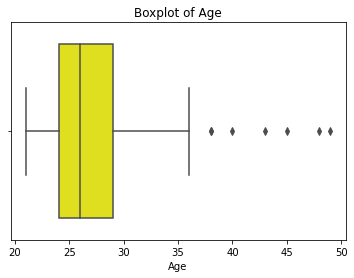

In [101]:
# Boxplot of Age
age = dataset['Age']
sns.boxplot(data = dataset,
            x = age,
            color = 'yellow')

plt.title(label   = 'Boxplot of Age')
plt.xlabel(xlabel = 'Age')

plt.show()

Since the majority of the respondents were in specific age groups, we analyzed the outliers to further develop the groups. Below we have created specific age groups to be used to enhance our analysis and recommendations. 

In [102]:
# Define a funtion for outlier flagging in the next cell
def flag_outlier(x):
    if x <= 36 and x >= 21:
        return 0
    
    else:
        return 1
    
# Create a new column out_age for outlier flagging

dataset['out_age'] = dataset['Age'].apply(lambda x: flag_outlier(x))

In [103]:
# Define a function to group different age 
def age_group(x):
    if x < 25:
        return 'Less than 25'
    
    elif x >= 25 and x <= 35:
        return 'Between 25 and 35'
    
    elif x > 35:
        return 'More than 35'
    
    else:
        print("Out of range")
        
# Create a new column based on question 'What is your age?'
dataset['Age_Group'] = dataset['Age'].apply(lambda x: age_group(x))

In [104]:
dataset['Age_Group'].value_counts()

Between 25 and 35    71
Less than 25         35
More than 35          8
Name: Age_Group, dtype: int64

### Inversing values 

For this analysis, the rankings were adjusted on the questions where the inverse is true. When a respondent ranks a question low where the inverse is positive then the function will convert the rating accordingly.

In [105]:
# Creating function to adjust answer numbers: 
def change_number (column): 
    dataset[column]=dataset[column].replace(to_replace=1,value=5)
    dataset[column]=dataset[column].replace(to_replace=5,value=1)
    dataset[column]=dataset[column].replace(to_replace=4,value=2)
    dataset[column]=dataset[column].replace(to_replace=2,value=4)

In [106]:
change_number(["Don't talk a lot",
'Leave my belongings around',
'Am relaxed most of the time',
'Have difficulty understanding abstract ideas',
'Insult people',
'Keep in the background',
'Make a mess of things', 
'Am not interested in abstract ideas',
"Am not interested in other people's problems",
'Have excellent ideas',
'Have little to say', 
"Often forget to put things back in their proper place",
"Do not have a good imagination",
"Am not really interested in others",
"Don't like to draw attention to myself",
"Shirk my duties",
"Am quiet around strangers",
"Don't  generate ideas that are new and different",
"Don't persuasively sell a vision or idea",
"Can't rally people on the team around a common goal",              
"Don't  generate ideas that are new and different",
"Don't persuasively sell a vision or idea",
"Can't rally people on the team around a common goal"])

## New variables with Big 5 Personalities and Hult DNA

In [107]:
#Big 5 Personality Traits

# column mapping
extrovered_index              = [1, 6, 11, 16, 21, 26, 31, 36, 41, 46]
agreeableness_index           = [2, 7, 12, 17, 22, 27, 32, 37, 42, 47]
conscientiousness_index       = [3, 8, 13, 18, 23, 28, 33, 38, 43, 48]
neuroticism_index             = [4, 9, 14, 19, 24, 29, 34, 39, 44, 49]
open_to_new_experiences_index = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

#Hult DNA

# column mapping
thinking_index      = [51, 52, 53, 54, 56]
communicating_index = [55, 57, 61, 62, 66]
team_building_index = [63, 64, 65, 67, 68, 69, 70]

In [108]:
# Creating new variables for big 5 personalities: 
dataset['Agreeableness'] = dataset.iloc[:,[2, 7, 12, 17, 22, 27, 32, 37, 42, 47]].mean(axis=1)
dataset['Conscientiousness'] = dataset.iloc[:,[3, 8, 13, 18, 23, 28, 33, 38, 43, 48]].mean(axis=1)
dataset['Extraversion'] = dataset.iloc[:,[1, 6, 11, 16, 21, 26, 31, 36, 41, 46]].mean(axis=1)
dataset['Neuroticism'] = dataset.iloc[:,[4, 9, 14, 19, 24, 29, 34, 39, 44, 49]].mean(axis=1)
dataset['Openness'] = dataset.iloc[:,[5, 10, 15, 20, 25, 30, 35, 40, 45, 50]].mean(axis=1)

# Creating new variables for Hult DNA:
dataset['Team building'] = dataset.iloc[:,[63, 64, 65, 67, 68, 69, 70]].mean(axis=1)
dataset['Thinking'] = dataset.iloc[:,[51, 52, 53, 54, 56]].mean(axis=1)
dataset['Communicating'] = dataset.iloc[:,[55, 57, 61, 62, 66]].mean(axis=1)

In [109]:
# Dropping original variables: 
survey = dataset.drop(dataset.columns[0:79], axis = 1)
# Show new features after cleaning
#survey.head()

### Feature Scaling

In [110]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(survey)


# TRANSFORMING our data after fit
X_scaled = scaler.transform(survey)


# converting scaled data into a DataFrame
survey_scaled = pd.DataFrame(X_scaled)


# reattaching column names
survey_scaled.columns = survey.columns


# checking pre- and post-scaling variance
print(np.var(survey), '\n\n')
print(np.var(survey_scaled))

Agreeableness        0.129388
Conscientiousness    0.147932
Extraversion         0.269348
Neuroticism          0.395066
Openness             0.104124
Team building        0.198289
Thinking             0.210477
Communicating        0.250526
dtype: float64 


Agreeableness        1.0
Conscientiousness    1.0
Extraversion         1.0
Neuroticism          1.0
Openness             1.0
Team building        1.0
Thinking             1.0
Communicating        1.0
dtype: float64


### Splitting the data 

In [111]:
# Splitting big 5 
Big5 = survey_scaled.iloc[:, 0:5] 

#Splitting HultDNA
Hult = survey_scaled.iloc[:, 5:8]

In [112]:
# Big5.head()

In [113]:
# Hult.head()

<div style='margin-top:0cm;margin-right:0cm;margin-bottom:10.0pt;margin-left:0cm;line-height:115%;font-size:15px;font-family:"Calibri Light",sans-serif;border-top:dotted #833C0B 1.0pt;border-left:none;border-bottom:dotted #833C0B 1.0pt;border-right:none;padding:1.0pt 0cm 6.0pt 0cm;'>
    <h2 style='margin-top:25.0pt;margin-right:0cm;margin-bottom:15.0pt;margin-left:0cm;text-align:center;border:none;padding:0cm;font-size:29px;font-family:"Calibri Light",sans-serif;color:#833C0B;font-weight:normal;'>Big 5</h2>
</div>

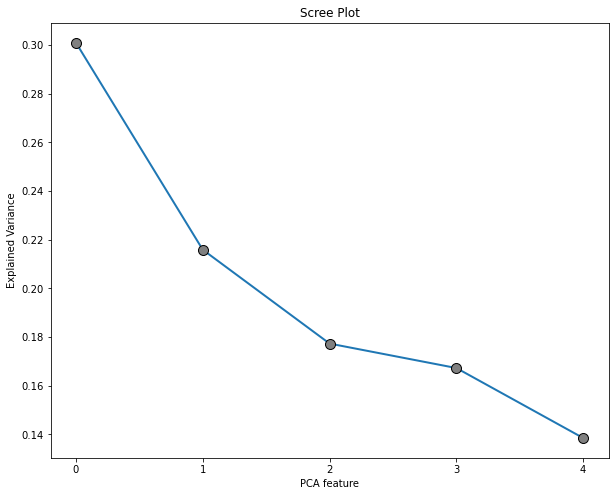

In [114]:
#Instantiating PCA object, Big 5, with no limit to principal components
Big5_pca = PCA(n_components = None,
         random_state = 802)

#Fitting and transforming
Big5_pca_fit = Big5_pca.fit_transform(Big5)

#Calling scree plot function 
scree_plot(pca_object = Big5_pca)

It is reasonable to retain all PCAs as the cumulative explained variance ratio is greater than or equal to 0.80. 

### Identifying Qualities of Principal Components

In [115]:
# transposing pca components (pc = MAX)
factor_loadings_Big5 = pd.DataFrame(np.transpose(Big5_pca.components_))

# naming rows as original features
factor_loadings_Big5 = factor_loadings_Big5.set_index(Big5.columns)

# naming each principal component
factor_loadings_Big5.columns = ['Conservative',         
                               'Self Regulation',          
                               'Warmhearted',          
                               'Action Taker',          
                               'Adventurer']          


# checking the result
factor_loadings_Big5

,Conservative,Self Regulation,Warmhearted,Action Taker,Adventurer
Agreeableness,-0.359809,-0.498908,0.718138,0.201814,-0.255298
Conscientiousness,-0.441458,0.373446,-0.230998,0.767908,-0.150366
Extraversion,-0.550830,0.120620,-0.235873,-0.556478,-0.562790
Neuroticism,-0.027606,-0.771087,-0.612400,0.165959,-0.045676
Openness,-0.609489,-0.050048,-0.015725,-0.179938,0.770321


### Big 5 PCA Components Interpretation


- **Factor 1: Conservative**

Is unwilling to embrace new experience and challenges and share their thoughts and feelings.

- **Factor 2: Self Regulated**

Is able to control their emotions. Goal-directed. But sometimes could be too strict.

- **Factor 3: Warmhearted**

Is able to control their emotions. Feels empathy and concern for other people.

- **Factor 4: Action Taker**

Don't talk much but plan ahead and think about how their behavior affects others, and are mindful of deadlines. 

- **Factor 5: Adventurer**

Tend to be more adventurous and creative and have a broad range of interests.

### Factor loadings for each customer

In [116]:
# analyzing factor strengths per customer
X_pca_reduced = Big5_pca.transform(Big5)


# converting to a DataFrame
X_pca_big5 = pd.DataFrame(X_pca_reduced)


# renaming columns
X_pca_big5.columns = factor_loadings_Big5.columns

# checking the results
X_pca_big5.head()

,Conservative,Self Regulation,Warmhearted,Action Taker,Adventurer
0,-1.178464,1.458634,-1.179038,1.165330,0.102167
1,-0.623106,0.038184,-1.258867,1.287655,0.878532
2,0.294619,1.762262,-0.445085,-0.438173,-0.681367
3,-0.341871,-1.467990,1.516909,0.405580,-0.353091
4,-0.601568,-0.553711,-1.124176,-0.215687,0.106402


In [117]:
# X_pca_big5.to_excel('./analysis_results/PCA Factor Loadings for Big5.xlsx', index = False)

<div style='margin-top:0cm;margin-right:0cm;margin-bottom:10.0pt;margin-left:0cm;line-height:115%;font-size:15px;font-family:"Calibri Light",sans-serif;border-top:line #833C0B 1.0pt;border-left:none;border-bottom:solid #833C0B 1.0pt;border-right:none;padding:1.0pt 0cm 6.0pt 0cm;'>
    <h2 style='margin-top:25.0pt;margin-right:0cm;margin-bottom:15.0pt;margin-left:0cm;text-align:center;border:none;padding:0cm;font-size:20px;font-family:"Calibri Light",sans-serif;color:#833C0B;font-weight:normal;'>Clustering</h2>
</div>

### Scaled version

In [118]:
# checking variance amongst clusters
#np.var(X_pca_big5)

In [119]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(X_pca_big5)


# TRANSFORMING our data after fit
X_scaled_pca_big5 = scaler.transform(X_pca_big5)


# converting scaled data into a DataFrame
pca_scaled_big5 = pd.DataFrame(X_scaled_pca_big5)


# reattaching column names
pca_scaled_big5.columns = ['Conservative',         
                           'Self Regulation',          
                           'Warmhearted',          
                           'Action Taker',          
                           'Adventurer'] 


# checking pre- and post-scaling variance
print(np.var(X_pca_big5), '\n\n')
print(np.var(pca_scaled_big5))

Conservative       1.504801
Self Regulation    1.079486
Warmhearted        0.886682
Action Taker       0.836408
Adventurer         0.692623
dtype: float64 


Conservative       1.0
Self Regulation    1.0
Warmhearted        1.0
Action Taker       1.0
Adventurer         1.0
dtype: float64


### Agglomerative clustering

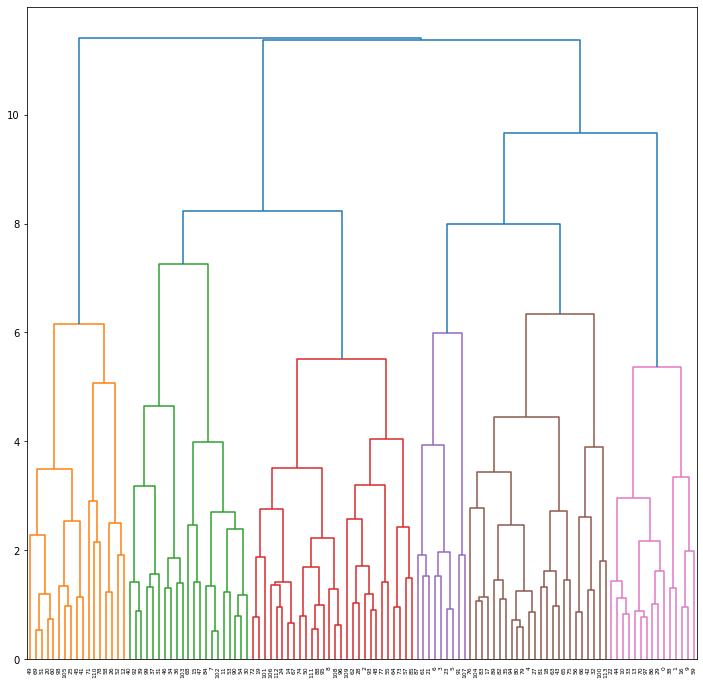

In [120]:
# grouping data based on Ward distance
standard_mergings_ward = linkage(y = pca_scaled_big5,
                                 method = 'ward',
                                 optimal_ordering = True)


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)


# saving and displaying the plot
plt.savefig('./analysis_images/standard_hierarchical_clust_ward.png')
plt.show()

### Inertia plot

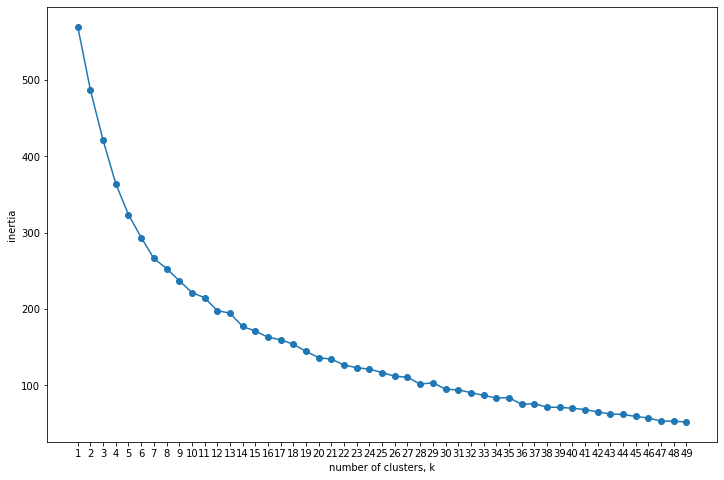

In [121]:
# calling the inertia_plot() function
interia_plot(data = pca_scaled_big5)

### Develop a k-Means model

In [122]:
# INSTANTIATING a k-Means object with clusters
big5_k_pca = KMeans(n_clusters   = 4,
                    random_state = 219)


# fitting the object to the data
big5_k_pca.fit(pca_scaled_big5)


# converting the clusters to a DataFrame
big5_kmeans_pca = pd.DataFrame({'Cluster': big5_k_pca.labels_})


# checking the results
print(big5_kmeans_pca.iloc[: , 0].value_counts())

0    40
3    32
2    27
1    15
Name: Cluster, dtype: int64


After analyzing the dendrogram there were 6 clusters which funneled into 4 as height increased. This helps us understand cluster formation and size. To maximize the use of the inertia plot, as the gap between clusters decreases and becomes constant the cluster right before is the optimal amount. Despite the plot showing an ideal amount of 5 clusters, the centroids and the dendrogram indicate the ideal amount of clusters is 4 to showcase extreme values within the clusters. 

### Display the centroids for each cluster

In [123]:
# storing cluster centers
centroids_pca_big5 = big5_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_big5_df = pd.DataFrame(centroids_pca_big5)


# renaming principal components
centroids_pca_big5_df.columns = ['Conservative',         
                               'Self Regulation',          
                               'Warmhearted',          
                               'Action Taker',          
                               'Adventurer']          


# checking results (clusters = rows, pc = columns)
centroids_pca_big5_df.round(2)

,Conservative,Self Regulation,Warmhearted,Action Taker,Adventurer
0,0.56,0.53,-0.19,-0.78,-0.20
1,0.60,-0.16,1.27,0.53,1.17
2,-0.23,-1.31,-0.34,-0.08,-0.23
3,-0.79,0.52,-0.06,0.79,-0.10


Due to the extreme values present within "Self Regulation", "Warmhearted", and "Adventurer" clusters 1 and 2 will be analyzed.

### Concatenate categorical columns and Big 5 PCA

In [124]:
# concatenating cluster memberships with principal components
big5_clst_pca_df = pd.concat([big5_kmeans_pca,
                              X_pca_big5],
                              axis = 1)


# checking results
big5_clst_pca_df

# concatenating demographic information with pca-clusters
big5_final_pca_clust_df = pd.concat([dataset.loc[ : , ['What laptop do you currently have?', 
                                                   'What laptop would you buy in next assuming if all laptops cost the same?',
                                                   'What program are you in?',
                                                   'Gender', 
                                                   'Age_Group',
                                                   'World_Region',
                                                   'What is your ethnicity?']],
                                    big5_clst_pca_df],
                                    axis = 1)

# renaming columns
big5_final_pca_clust_df.columns = ['Current Laptop',
                                  'Next Laptop',
                                  'Program',
                                  'Gender',
                                  'Age_Group',
                                  'World_Region',
                                  'Ethnicity',
                                  'Big5 Cluster',
                                  'Conservative',         
                                   'Self Regulation',          
                                   'Warmhearted',          
                                   'Action Taker',          
                                   'Adventurer']


# checking the results
#big5_final_pca_clust_df.head(n = 3)

<div style='margin-top:0cm;margin-right:0cm;margin-bottom:10.0pt;margin-left:0cm;line-height:115%;font-size:15px;font-family:"Calibri Light",sans-serif;border-top:dotted #833C0B 1.0pt;border-left:none;border-bottom:dotted #833C0B 1.0pt;border-right:none;padding:1.0pt 0cm 6.0pt 0cm;'>
    <h2 style='margin-top:25.0pt;margin-right:0cm;margin-bottom:15.0pt;margin-left:0cm;text-align:center;border:none;padding:0cm;font-size:29px;font-family:"Calibri Light",sans-serif;color:#833C0B;font-weight:normal;'>Hult DNA</h2>
</div>

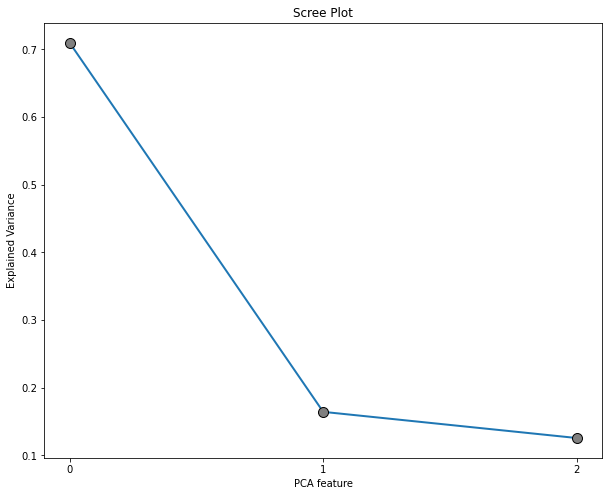

In [125]:
#Instantiating PCA object, Hult DNA, with no limit to principal components
Hult_pca = PCA(n_components = None,
         random_state = 802)

#Fitting and transforming
Hult_pca_fit = Hult_pca.fit_transform(Hult)

#Calling scree plot function
scree_plot(pca_object = Hult_pca)

### Identifying Qualities of Principal Components

In [126]:
# transposing pca components
factor_loadings_hult = pd.DataFrame(np.transpose(Hult_pca.components_))


# naming rows as original features
factor_loadings_hult = factor_loadings_hult.set_index(Hult.columns)

# naming each principal component
factor_loadings_hult.columns = ['The Beginner',          # low negatives in every personality traits
                             'The Independent',          # low in team building, high in thinking
                             'The Chatterbox']           # low in thinking, high in communicating


# checking the result
factor_loadings_hult

,The Beginner,The Independent,The Chatterbox
Team building,-0.559244,-0.802553,-0.207739
Thinking,-0.578651,0.557346,-0.595423
Communicating,-0.593641,0.212779,0.776090


### Hult DNA PCA Component Interpretation

This analysis has been made based on the explanation of the Hult DNA (Shaheem, 2019)

<b>- Factor 1: The Beginner</b><br>

The very new Hult student who still has a lot of work to develop their skills in Team building, thinking and communicating.

<b>- Factor 2: The Independent</b><br>

This persona is not good at fostering collaborative relationships with their peers and does not know how to deal constructively with conflicts.

<b>- Factor 3: The Chatterbox</b><br>

Even if this persona does not show self-awareness and no dynamic thinking, they speak and listen carefully and skillfully. This behavior leads to a development of the Thinking skill in the long-term. 

### Factor loadings for each customer

In [127]:
# analyzing factor strengths per customer
X_Hult_pca_reduced = Hult_pca.transform(Hult)


# converting to a DataFrame
X_Hult_pca_df = pd.DataFrame(X_Hult_pca_reduced)


# renaming columns
X_Hult_pca_df.columns = factor_loadings_hult.columns


# checking the results
X_Hult_pca_df.head()

,The Beginner,The Independent,The Chatterbox
0,-0.556278,-0.214547,-0.366682
1,-0.302941,-1.060944,0.059153
2,0.940058,-0.307563,0.288524
3,-1.001669,0.243030,1.226630
4,2.154036,0.158287,-0.455198


In [128]:
#X_Hult_pca_df.to_excel('./analysis_results/PCA Factor Loadings.xlsx', index = False)

<div style='margin-top:0cm;margin-right:0cm;margin-bottom:10.0pt;margin-left:0cm;line-height:115%;font-size:15px;font-family:"Calibri Light",sans-serif;border-top:line #833C0B 1.0pt;border-left:none;border-bottom:solid #833C0B 1.0pt;border-right:none;padding:1.0pt 0cm 6.0pt 0cm;'>
    <h2 style='margin-top:25.0pt;margin-right:0cm;margin-bottom:15.0pt;margin-left:0cm;text-align:center;border:none;padding:0cm;font-size:20px;font-family:"Calibri Light",sans-serif;color:#833C0B;font-weight:normal;'>Clustering</h2>
</div>

### Scaled version

In [129]:
# checking variance amongst clusters
#np.var(X_Hult_pca_df)

In [130]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(X_Hult_pca_df)


# TRANSFORMING our data after fit
X_Hult_scaled_pca = scaler.transform(X_Hult_pca_df)


# converting scaled data into a DataFrame
pca_Hult_scaled = pd.DataFrame(X_Hult_scaled_pca)


# reattaching column names
pca_Hult_scaled.columns = ['The Beginner',          # low negatives in every personality traits
                             'The Independent',          # low in team building, high in thinking
                             'The Chatterbox']           # low in thinking, high in communicating


# checking pre- and post-scaling variance
print(np.var(X_Hult_pca_df), '\n\n')
print(np.var(pca_Hult_scaled))

The Beginner       2.129689
The Independent    0.493186
The Chatterbox     0.377126
dtype: float64 


The Beginner       1.0
The Independent    1.0
The Chatterbox     1.0
dtype: float64


### Agglomerative clustering

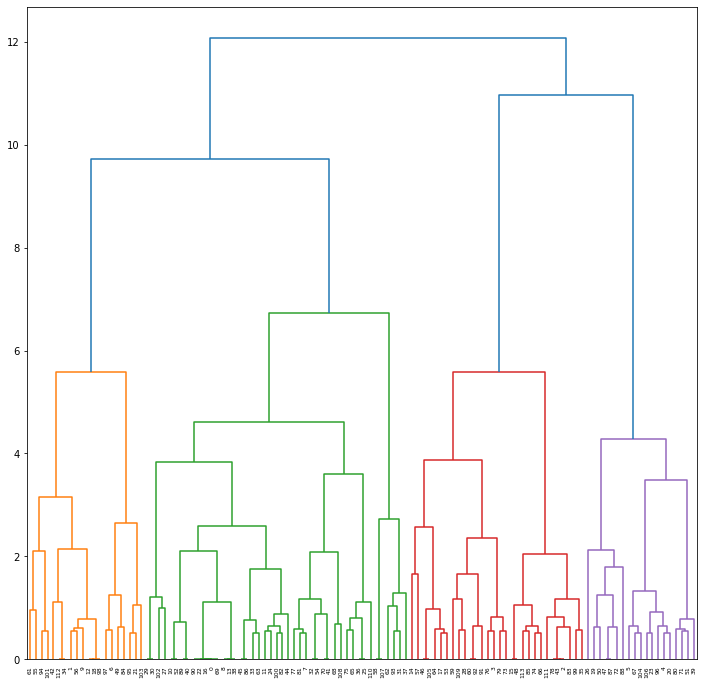

In [131]:
# grouping data based on Ward distance
standard_mergings_ward = linkage(y = pca_Hult_scaled,
                                 method = 'ward',
                                 optimal_ordering = True)


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)


# saving and displaying the plot
#plt.savefig('./analysis_images/standard_hierarchical_clust_ward.png')
plt.show()

### Inertia plot

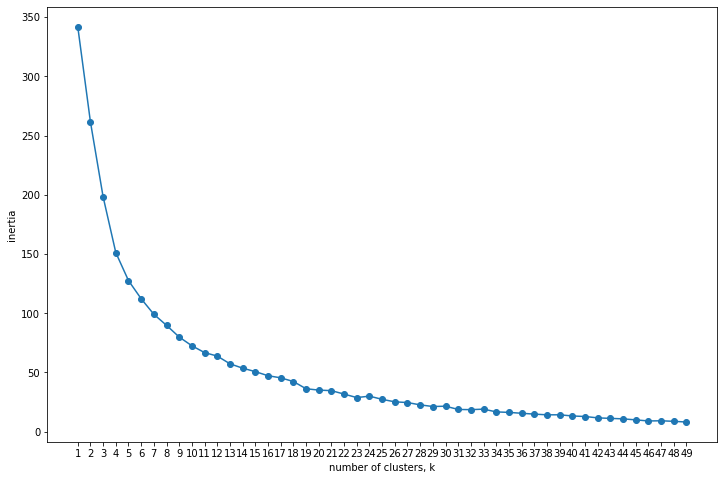

In [132]:
# calling the inertia_plot() function
interia_plot(data = pca_Hult_scaled)

### Develop a k-Means model

In [133]:
# INSTANTIATING a k-Means object with clusters
survey_k_pca_hult = KMeans(n_clusters   = 4,
                         random_state = 219)


# fitting the object to the data
survey_k_pca_hult.fit(pca_Hult_scaled)


# converting the clusters to a DataFrame
survey_kmeans_pca_hult = pd.DataFrame({'Cluster': survey_k_pca_hult.labels_})


# checking the results
print(survey_kmeans_pca_hult.iloc[: , 0].value_counts())

3    42
1    28
2    25
0    19
Name: Cluster, dtype: int64


The inertia and dendrogram plots aid in solidifying which number of clusters to use to determine the variance among each factor component. The length between points on the inertia plot begins to decrease and then remain constant after four clusters. After analyzing the variances within each cluster it was confirmed the majority of extremities existed when using four clusters. 

### Display the centroids for each cluster

In [134]:
# storing cluster centers
centroids_pca_hult = survey_k_pca_hult.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df_hult = pd.DataFrame(centroids_pca_hult)


# renaming principal components
centroids_pca_df_hult.columns = ['The Beginner',          # low negatives in every personality traits
                             'The Independent',          # low in team building, high in thinking
                             'The Chatterbox']           # low in thinking, high in communicating


# checking results (clusters = rows, pc = columns)
centroids_pca_df_hult.round(2)

,The Beginner,The Independent,The Chatterbox
0,1.53,0.41,-0.43
1,0.01,-1.18,-0.09
2,-0.02,0.21,1.47
3,-0.68,0.48,-0.62


Due to the extreme values present within "The Beginner" and "The Chatterbox", clusters 0 and 2 will be analyzed.

### Concatenate categorical columns and Hult PCA 

In [135]:
# concatenating cluster memberships with principal components
clst_pca_df_hult = pd.concat([survey_kmeans_pca_hult,
                         X_Hult_pca_df],
                         axis = 1)


# checking results
clst_pca_df_hult

# concatenating demographic information with pca-clusters
final_pca_clust_df_hult = pd.concat([dataset.loc[ : , ['What laptop do you currently have?', 
                                                   'What laptop would you buy in next assuming if all laptops cost the same?',
                                                   'What program are you in?',
                                                   'Gender', 
                                                   'Age_Group',
                                                   'World_Region',
                                                   'What is your ethnicity?']],
                                clst_pca_df_hult],
                                axis = 1)

# renaming columns
final_pca_clust_df_hult.columns = ['Current Laptop',
                              'Next Laptop',
                              'Program',
                              'Gender',
                              'Age_Group',
                              'World_Region',
                              'Ethnicity',
                              'Cluster',
                              'The Beginner',          
                              'The Independent',         
                              'The Chatterbox']         


# checking the results
#final_pca_clust_df_hult.head(n = 3)

<div style='margin-top:0cm;margin-right:0cm;margin-bottom:10.0pt;margin-left:0cm;line-height:115%;font-size:15px;font-family:"Calibri Light",sans-serif;border-top:line #833C0B 1.0pt;border-left:none;border-bottom:solid #833C0B 1.0pt;border-right:none;padding:1.0pt 0cm 6.0pt 0cm;'>
    <h2 style='margin-top:25.0pt;margin-right:0cm;margin-bottom:15.0pt;margin-left:0cm;text-align:center;border:none;padding:0cm;font-size:20px;font-family:"Calibri Light",sans-serif;color:#833C0B;font-weight:normal;'>Hult DNA Visualization</h2>
</div>

To avoid data dumpling and printing extensive amount of graphs some of the cells are frozen. 

### Laptop based on Hult DNA

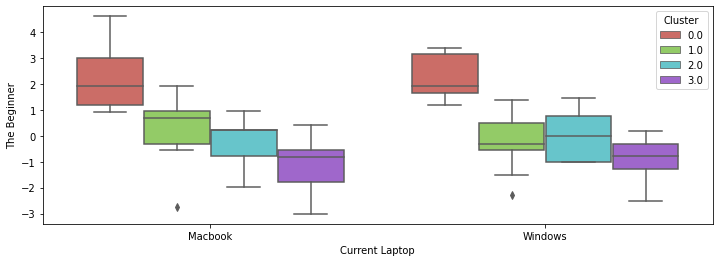

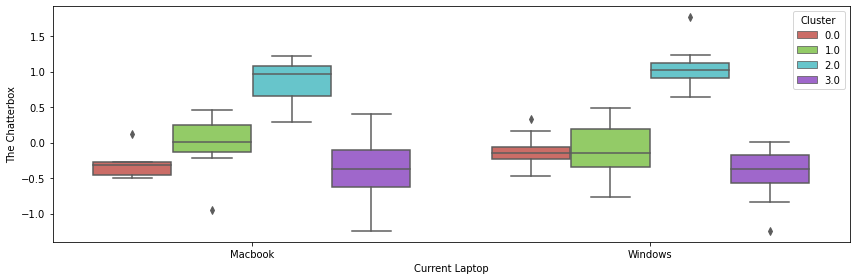

In [136]:
#  Current Laptop - Hult DNA
############################  

# 1
fig, ax = plt.subplots(figsize = (12, 4))
sns.boxplot(x = 'Current Laptop',
            y = 'The Beginner',
            hue = 'Cluster',
            palette = 'hls',
            data = final_pca_clust_df_hult)

# 2
#fig, ax = plt.subplots(figsize = (12, 4))
#sns.boxplot(x = 'Current Laptop',
 #           y = 'The Independent',
  #          hue = 'Cluster',
   #         palette = 'hls',
    #        data = final_pca_clust_df_hult)


# 3
fig, ax = plt.subplots(figsize = (12, 4))
sns.boxplot(x = 'Current Laptop',
            y = 'The Chatterbox',
            hue = 'Cluster',
            palette = 'hls',
            data = final_pca_clust_df_hult)


# Print Boxplots
plt.tight_layout()
plt.show()

In [ ]:
#  Next Laptop - Hult DNA
############################ 
# 1
fig, ax = plt.subplots(figsize = (12, 4))
sns.boxplot(x = 'Next Laptop',
            y = 'The Beginner',
            hue = 'Cluster',
            palette = 'hls',
            data = final_pca_clust_df_hult)

# 2
#fig, ax = plt.subplots(figsize = (12, 4))
#sns.boxplot(x = 'Next Laptop',
 #           y = 'The Independent',
  #          hue = 'Cluster',
   #         palette = 'hls',
    #        data = final_pca_clust_df_hult)


# 3
fig, ax = plt.subplots(figsize = (12, 4))
sns.boxplot(x = 'Next Laptop',
            y = 'The Chatterbox',
            hue = 'Cluster',
            palette = 'hls',
            data = final_pca_clust_df_hult)


# Print Boxplots
plt.tight_layout()
plt.show()

### Demographics


In [ ]:
# Gender - Hult DNA #
########################

# Factor 1
fig, ax = plt.subplots(figsize = (12, 6))
sns.boxplot(x = 'Gender',
            y = 'The Beginner',
            hue = 'Cluster',
            palette = 'hls',
            data = final_pca_clust_df_hult)


# Factor 2
#fig, ax = plt.subplots(figsize = (12, 6))
#sns.boxplot(x = 'Gender',
 #           y = 'The Independent',
  #          hue = 'Cluster',
   #         palette = 'hls',
    #        data = final_pca_clust_df_hult)

fig, ax = plt.subplots(figsize = (12, 6))
sns.boxplot(x = 'Gender',
            y = 'The Chatterbox',
            hue = 'Cluster',
            palette = 'hls',
            data = final_pca_clust_df_hult)

# formatting and displaying the plot
plt.tight_layout()
plt.show() 

In [ ]:
# Hult Program - Hult DNA #
###########################

# 1
fig, ax = plt.subplots(figsize = (12,4))
sns.boxplot(x = 'Program',
            y = 'The Beginner',
            hue = 'Cluster',
            palette = 'hls',
            data = final_pca_clust_df_hult)

# 2
#fig, ax = plt.subplots(figsize = (12, 4))
#sns.boxplot(x = 'Program',
 #           y = 'The Independent',
     #       hue = 'Cluster',
      #      palette = 'hls',
       #     data = final_pca_clust_df_hult)


# 3
fig, ax = plt.subplots(figsize = (12, 4))
sns.boxplot(x = 'Program',
            y = 'The Chatterbox',
            hue = 'Cluster',
            palette = 'hls',
            data = final_pca_clust_df_hult)


# Print Boxplots
plt.tight_layout()
plt.show()

In [ ]:
# Age Group  -   Hult DNA #
###########################


# 1
fig, ax = plt.subplots(figsize = (12, 6))
sns.boxplot(x = 'Age_Group',
            y = 'The Beginner',
            hue = 'Cluster',
            palette = 'hls',
            data = final_pca_clust_df_hult)

# 2
#fig, ax = plt.subplots(figsize = (12, 6))
#sns.boxplot(x = 'Age_Group',
 #           y = 'The Independent',
  #          hue = 'Cluster',
   #         palette = 'hls',
    #        data = final_pca_clust_df_hult)


# 3
fig, ax = plt.subplots(figsize = (12, 6))
sns.boxplot(x = 'Age_Group',
            y = 'The Chatterbox',
            hue = 'Cluster',
            palette = 'hls',
            data = final_pca_clust_df_hult)


# Print Boxplots
plt.tight_layout()
plt.show()

In [ ]:
# Nationality  -   Hult DNA #
###########################
# 1
fig, ax = plt.subplots(figsize = (12, 4))
sns.boxplot(x = 'World_Region',
            y = 'The Beginner',
            hue = 'Cluster',
            palette = 'hls',
            data = final_pca_clust_df_hult)

# 2
#fig, ax = plt.subplots(figsize = (12,4))
#sns.boxplot(x = 'World_Region',
 #           y = 'The Independent',
  #          hue = 'Cluster',
   #         palette = 'hls',
    #        data = final_pca_clust_df_hult)


# 3
fig, ax = plt.subplots(figsize = (12, 4))
sns.boxplot(x = 'World_Region',
            y = 'The Chatterbox',
            hue = 'Cluster',
            palette = 'hls',
            data = final_pca_clust_df_hult)


# Print Boxplots
plt.tight_layout()
plt.show()

### Insights

When identifying customers using the Hult DNA, we see early adoption rates within  the “Beginners” and “Chatterbox”. 

Beginners:
These knowledge hungry students are ready to learn. Aged 25-35, they want to embrace the Apple Ecosystem by carrying all apple products and having them synced together. 

Chatterbox: 
These students know how to listen and think and when it comes to thinking about a long-term purchase they know embedding themselves within the Apple ecosystem is the way to go. 

<div style='margin-top:0cm;margin-right:0cm;margin-bottom:10.0pt;margin-left:0cm;line-height:115%;font-size:15px;font-family:"Calibri Light",sans-serif;border-top:line #833C0B 1.0pt;border-left:none;border-bottom:solid #833C0B 1.0pt;border-right:none;padding:1.0pt 0cm 6.0pt 0cm;'>
    <h2 style='margin-top:25.0pt;margin-right:0cm;margin-bottom:15.0pt;margin-left:0cm;text-align:center;border:none;padding:0cm;font-size:20px;font-family:"Calibri Light",sans-serif;color:#833C0B;font-weight:normal;'>Big 5 Visualization</h2>
</div>

### Laptop based on Big 5

In [ ]:
# Current Laptop -   Big 5 #
###########################

# 1
#fig, ax = plt.subplots(figsize = (12, 4))
#sns.boxplot(x = 'Current Laptop',
 #           y = 'Conservative',
  #          hue = 'Big5 Cluster',
   #         palette = 'Paired',
    #        data = big5_final_pca_clust_df)

# 2
fig, ax = plt.subplots(figsize = (12, 4))
sns.boxplot(x = 'Current Laptop',
            y = 'Self Regulation',
            hue = 'Big5 Cluster',
            palette = 'Paired',
            data = big5_final_pca_clust_df)

# 3
fig, ax = plt.subplots(figsize = (12, 4))
sns.boxplot(x = 'Current Laptop',
            y = 'Warmhearted',
            hue = 'Big5 Cluster',
            palette = 'Paired',
            data = big5_final_pca_clust_df)

# 4
#fig, ax = plt.subplots(figsize = (12,4))
#sns.boxplot(x = 'Current Laptop',
 #           y = 'Action Taker',
  #          hue = 'Big5 Cluster',
   #         palette = 'Paired',
    #        data = big5_final_pca_clust_df)

# 5
#fig, ax = plt.subplots(figsize = (12, 4))
#sns.boxplot(x = 'Current Laptop',
 #           y = 'Adventurer',
  #          hue = 'Big5 Cluster',
   #         palette = 'Paired',
    #        data = big5_final_pca_clust_df)

# Print Boxplots
plt.tight_layout()
plt.show()

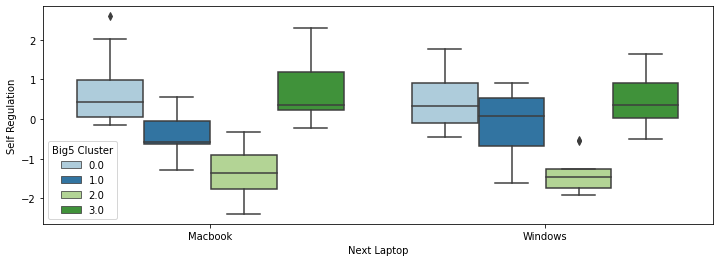

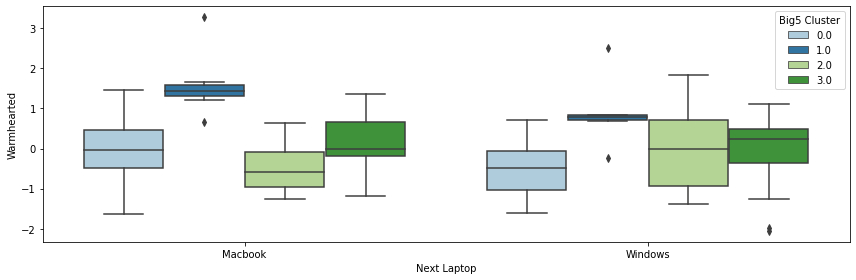

In [137]:
# Next Laptop -   Big 5 #
###########################

# 1
#fig, ax = plt.subplots(figsize = (12, 4))
#sns.boxplot(x = 'Next Laptop',
 #           y = 'Conservative',
  #          hue = 'Big5 Cluster',
   #         palette = 'Paired',
    #        data = big5_final_pca_clust_df)

# 2
fig, ax = plt.subplots(figsize = (12, 4))
sns.boxplot(x = 'Next Laptop',
            y = 'Self Regulation',
            hue = 'Big5 Cluster',
            palette = 'Paired',
            data = big5_final_pca_clust_df)

# 3
fig, ax = plt.subplots(figsize = (12, 4))
sns.boxplot(x = 'Next Laptop',
            y = 'Warmhearted',
            hue = 'Big5 Cluster',
            palette = 'Paired',
            data = big5_final_pca_clust_df)

# 4
#fig, ax = plt.subplots(figsize = (12, 4))
#sns.boxplot(x = 'Next Laptop',
 #           y = 'Action Taker',
  #          hue = 'Big5 Cluster',
   #        palette = 'Paired',
    #        data = big5_final_pca_clust_df)

# 5
#fig, ax = plt.subplots(figsize = (12, ))
#sns.boxplot(x = 'Next Laptop',
 #           y = 'Adventurer',
  #          hue = 'Big5 Cluster',
   #         palette = 'Paired',
    #        data = big5_final_pca_clust_df)

# Print Boxplots
plt.tight_layout()
plt.show()

### Demographics


In [ ]:
# Gender -   Big 5 #
###########################

# Factor 1
#fig, ax = plt.subplots(figsize = (12, 6))
#sns.boxplot(x = 'Gender',
 #           y = 'Conservative',
  #          hue = 'Big5 Cluster',
   #         palette = 'Paired',
    #        data = big5_final_pca_clust_df)


# Factor 2
#fig, ax = plt.subplots(figsize = (12, 6))
#sns.boxplot(x = 'Gender',
 #           y = 'Self Regulation',
  #          hue = 'Big5 Cluster',
   #         palette = 'Paired',
    #        data = big5_final_pca_clust_df)

# Factor 3
fig, ax = plt.subplots(figsize = (12, 6))
sns.boxplot(x = 'Gender',
            y = 'Warmhearted',
            hue = 'Big5 Cluster',
            palette = 'Paired',
            data = big5_final_pca_clust_df)

# Factor 4
#fig, ax = plt.subplots(figsize = (12, 6))
#sns.boxplot(x = 'Gender',
 #           y = 'Action Taker',
  #          hue = 'Big5 Cluster',
   #         palette = 'Paired',
    #        data = big5_final_pca_clust_df)

# Factor 5
# fig, ax = plt.subplots(figsize = (12, 6))
#sns.boxplot(x = 'Gender',
 #           y = 'Adventurer',
  #          hue = 'Big5 Cluster',
   #         palette = 'Paired',
    #        data = big5_final_pca_clust_df)

# formatting and displaying the plot
plt.tight_layout()
plt.show()

In [ ]:
# Program -   Big 5 #
###########################

# 1
#fig, ax = plt.subplots(figsize = (12, 6))
#sns.boxplot(x = 'Program',
 #           y = 'Conservative',
  #          hue = 'Big5 Cluster',
   #         palette = 'Paired',
    #        data = big5_final_pca_clust_df)

# 2
fig, ax = plt.subplots(figsize = (12, 6))
sns.boxplot(x = 'Program',
            y = 'Self Regulation',
            hue = 'Big5 Cluster',
            palette = 'Paired',
            data = big5_final_pca_clust_df)

# 3
fig, ax = plt.subplots(figsize = (12, 6))
sns.boxplot(x = 'Program',
            y = 'Warmhearted',
            hue = 'Big5 Cluster',
            palette = 'Paired',
            data = big5_final_pca_clust_df)

# 4
#fig, ax = plt.subplots(figsize = (12, 6))
#sns.boxplot(x = 'Program',
 #           y = 'Action Taker',
  #          hue = 'Big5 Cluster',
   #         palette = 'Paired',
    #        data = big5_final_pca_clust_df)

# 5
#fig, ax = plt.subplots(figsize = (12, 6))
#sns.boxplot(x = 'Program',
 #           y = 'Adventurer',
  #          hue = 'Big5 Cluster',
   #         palette = 'Paired',
    #        data = big5_final_pca_clust_df)

# Print Boxplots
plt.tight_layout()
plt.show()

In [ ]:
# Age Group  -   Big 5 #
###########################
# 1
#fig, ax = plt.subplots(figsize = (12, 6))
#sns.boxplot(x = 'Age_Group',
 #           y = 'Conservative',
  #          hue = 'Big5 Cluster',
   #         palette = 'Paired',
    #        data = big5_final_pca_clust_df)

# 2
#fig, ax = plt.subplots(figsize = (12, 6))
#sns.boxplot(x = 'Age_Group',
 #           y = 'Self Regulation',
  #          hue = 'Big5 Cluster',
   #         palette = 'Paired',
    #        data = big5_final_pca_clust_df)


# 3
fig, ax = plt.subplots(figsize = (12, 6))
sns.boxplot(x = 'Age_Group',
            y = 'Warmhearted',
            hue = 'Big5 Cluster',
            palette = 'Paired',
            data = big5_final_pca_clust_df)

# 3
#fig, ax = plt.subplots(figsize = (12, 6))
#sns.boxplot(x = 'Age_Group',
 #           y = 'Action Taker',
  #          hue = 'Big5 Cluster',
   #         palette = 'Paired',
    #        data = big5_final_pca_clust_df)

# 3
#fig, ax = plt.subplots(figsize = (12, 6))
#sns.boxplot(x = 'Age_Group',
 #           y = 'Adventurer',
  #          hue = 'Big5 Cluster',
   #         palette = 'Paired',
    #        data = big5_final_pca_clust_df)

# Print Boxplots
plt.tight_layout()
plt.show()

In [ ]:
# Nationality  -   Hult DNA #
###########################
# 1
#fig, ax = plt.subplots(figsize = (12, 6))
#sns.boxplot(x = 'World_Region',
 #           y = 'Conservative',
  #          hue = 'Big5 Cluster',
   #         palette = 'Paired',
    #        data = big5_final_pca_clust_df)

# 2
fig, ax = plt.subplots(figsize = (12, 6))
sns.boxplot(x = 'World_Region',
            y = 'Self Regulation',
            hue = 'Big5 Cluster',
            palette = 'Paired',
            data = big5_final_pca_clust_df)


# 3
fig, ax = plt.subplots(figsize = (12, 6))
sns.boxplot(x = 'World_Region',
            y = 'Warmhearted',
            hue = 'Big5 Cluster',
            palette = 'Paired',
            data = big5_final_pca_clust_df)

# 3
#fig, ax = plt.subplots(figsize = (12, 6))
#sns.boxplot(x = 'World_Region',
 #           y = 'Action Taker',
  #          hue = 'Big5 Cluster',
   #         palette = 'Paired',
    #        data = big5_final_pca_clust_df)

# 3
#fig, ax = plt.subplots(figsize = (12, 6))
#sns.boxplot(x = 'World_Region',
 #           y = 'Adventurer',
  #          hue = 'Big5 Cluster',
   #         palette = 'Paired',
    #        data = big5_final_pca_clust_df)

# Print Boxplots
plt.tight_layout()
plt.show()

### Insights

Apple has had much success amongst the “warmhearted” so much so some within this segment plan to convert from a windows to Mac user with their next purchase. Apple has successfully targeted empathetic people, specifically women with their relatable and sensitive advertising campaigns. These women are also highly knowledgeable as they plan to dominate business fields with their dual degrees (overlap in business analytics). Macs are being adopted by young professional coders (aged 25-35) with heave adoption rates coming from the Asian students. 

We see negative extreme centroids within the second cluster of "self regulated". The majority are coming from Europe and are becoming less prone to buying Macs as they are currently Mac owners but plan to switch to windows. They are heavily involved in the business analytics field. 


<div style='margin-top:0cm;margin-right:0cm;margin-bottom:10.0pt;margin-left:0cm;line-height:115%;font-size:15px;font-family:"Calibri Light",sans-serif;border-top:dotted #833C0B 1.0pt;border-left:none;border-bottom:dotted #833C0B 1.0pt;border-right:none;padding:1.0pt 0cm 6.0pt 0cm;'>
    <h2 style='margin-top:25.0pt;margin-right:0cm;margin-bottom:15.0pt;margin-left:0cm;text-align:center;border:none;padding:0cm;font-size:29px;font-family:"Calibri Light",sans-serif;color:#833C0B;font-weight:normal;'>Recommendations</h2>
</div>

Based on the analysis, and after identifying different personae for the wide range of the company's clients, Apple can use their knowledge within the industry and the aforementioned analysis to augment their position through customer acquisition and retention.


This analysis aided by enabling the creation of different personae representing the Macbook clientele and who is more likely to buy a Mac. Furthermore, it pinpoints what experience the consumer is looking for when doing so. The data was split pretty equally between MacBook and windows users. Despite this being a small sample size Apple can do the following: 

  <ul style="margin-bottom:0cm;list-style-type: disc;">
        <li style='margin-top:0cm;margin-right:0cm;margin-bottom:10.0pt;margin-left:0cm;line-height:115%;font-size:15px;font-family:"Arial Light",sans-serif;'><span style='font-family:"Arial",sans-serif;font-size:14px;'>Shorten survey length to ensure quality data collection as longer surveys are proven to be prone to lower quality responses  <a href="https://peoplepulse.com/resources/useful-articles/excessive-survey-length">(Paul Quinn)</a>.</span></li>
    </ul>
    
   <ul style="margin-bottom:0cm;list-style-type: disc;">
        <li style='margin-top:0cm;margin-right:0cm;margin-bottom:10.0pt;margin-left:0cm;line-height:115%;font-size:15px;font-family:"Arial Light",sans-serif;'><span style='font-family:"Arial",sans-serif;font-size:14px;'>The Beginners and Chatterbox are willing to be engulfed in the Apple Ecosystem so targeting them with complimenting products will only further deepen their connection to Apple  <a href="https://research-methodology.net/apple-ecosystem-closed-effective"> (John Dudovskiy)</a>.</span></li>
    </ul>
    <ul style="margin-bottom:0cm;list-style-type: disc;">
        <li style='margin-top:0cm;margin-right:0cm;margin-bottom:10.0pt;margin-left:0cm;line-height:115%;font-size:15px;font-family:"Arial Light",sans-serif;'><span style='font-family:"Arial",sans-serif;font-size:14px;'>Asian markets are growing while European is diminishing as seen within the warmhearted and self regulated clusters (Adam Rothman). Create a marketing campaign pinpointing the power of Macs and the hardware embedded within the computer. Its not just a screen for everyday use but a computer for professionals with the power to complete any task  <a href="https://www.macworld.com/article/3137575/the-new-macbook-pro-isnt-just-a-laptop-its-a-strategy-shift.html">(Michael Simon).</span></li>
    </ul>

# Bibliography

Cherry, K. (2021, February 20). What are the big 5 personality traits? Retrieved February 23, 2021, from https://www.verywellmind.com/the-big-five-personality-dimensions-2795422#what-are-the-big-five-dimensions-of-personality <br><br>
Dudovsky, J., 2019, Apple Ecosystem: closed and effective, Available at https://research-methodology.net/apple-ecosystem-closed-effective, accessed at 02.22.2021.<br><br>
Rothman, L. (2020, September 16). Apple's 5 most profitable BUSINESS Regions (aapl). Retrieved February 23, 2021, from https://www.investopedia.com/articles/markets/031316/apples-5-most-profitable-lines-business-aapl.asp <br><br>
Shaheem, S. (2019). Why every leader needs a growth mindset. Retrieved from Hult Blog: https://www.hult.edu/blog/why-every-leader-needs-growth-mindset/#:~:text=The%20Hult%20DNA%E2%80%94Learning%20to%20lead&text=The%20Hult%20DNA%20is%20a,%2C%20Communicating%2C%20and%20Team%20Building.&text=The%20results%20form%20the%20basis%20of%20a%20leader <br><br>
Simon, M. (2016, November 02). The new MacBook Pro isn't just a laptop, it's a strategy shift. Retrieved February 23, 2021, from https://www.macworld.com/article/3137575/the-new-macbook-pro-isnt-just-a-laptop-its-a-strategy-shift.html <br><br>
Quinn, P. (2019, July 02). Excessive survey length - improving survey effectiveness! Retrieved February 23, 2021, from https://peoplepulse.com/resources/useful-articles/excessive-survey-length/ <br><br>